Arrays in .npz file: ['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']

Array: train_images
Shape: (11959, 28, 28, 3), Dtype: uint8
First few elements: [250 223 206 255 229 212 251 222 206 229]

Array: train_labels
Shape: (11959, 1), Dtype: uint8
First few elements: [7 3 6 6 7 6 2 2 7 2]


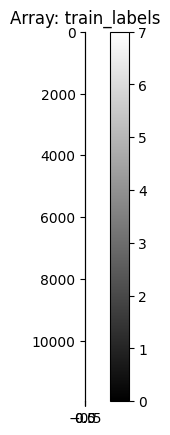


Array: val_images
Shape: (1712, 28, 28, 3), Dtype: uint8
First few elements: [255 229 194 255 229 196 255 228 198 255]

Array: val_labels
Shape: (1712, 1), Dtype: uint8
First few elements: [4 0 7 6 1 6 1 7 6 5]


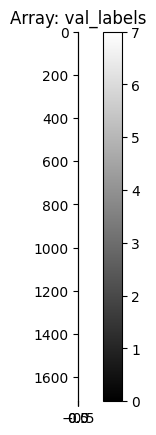


Array: test_images
Shape: (3421, 28, 28, 3), Dtype: uint8
First few elements: [232 200 179 255 227 202 255 236 206 252]

Array: test_labels
Shape: (3421, 1), Dtype: uint8
First few elements: [3 0 1 3 1 1 3 1 6 1]


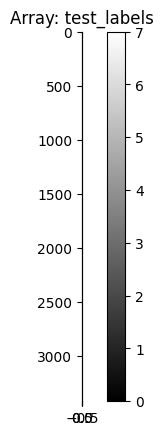

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('bloodmnist.npz')  

print("Arrays in .npz file:", data.files)

for array_name in data.files:
    array = data[array_name]
    print(f"\nArray: {array_name}")
    print(f"Shape: {array.shape}, Dtype: {array.dtype}")
    print("First few elements:", array.flatten()[:10])

    if array.ndim == 2:
        plt.imshow(array, cmap='gray')
        plt.title(f"Array: {array_name}")
        plt.colorbar()
        plt.show()


In [ ]:
import os
import argparse
import sys

sys.argv = [
    "colab_kernel_launcher.py",
    "--input_file", "/content/bloodmnist.npz",  
    "--output_dir", "output_directory",
    "--output_format", "images"  
]
import numpy as np
from PIL import Image

def save_to_images(data, labels, output_dir):

    os.makedirs(output_dir, exist_ok=True)
    for idx, (image, label) in enumerate(zip(data, labels)):
        label_dir = os.path.join(output_dir, str(label))
        os.makedirs(label_dir, exist_ok=True)
        img = Image.fromarray(image)
        img.save(os.path.join(label_dir, f"{idx}.png"))
    print(f"Saved images to {output_dir}")

def save_to_csv(data, labels, output_file):

    flattened_data = data.reshape(data.shape[0], -1)
    csv_data = np.column_stack((flattened_data, labels))
    header = [f"pixel_{i}" for i in range(flattened_data.shape[1])] + ["label"]
    np.savetxt(output_file, csv_data, delimiter=",", header=",".join(header), fmt='%d', comments='')
    print(f"Saved CSV to {output_file}")

def process_split(data, labels, output_dir, output_format):

    if output_format == "images":
        save_to_images(data, labels, output_dir)
    elif output_format == "csv":
        save_to_csv(data, labels, os.path.join(output_dir, "data.csv"))
    else:
        raise ValueError("Unsupported output format. Choose 'csv' or 'images'.")

def main():
    parser = argparse.ArgumentParser(description="Convert MedMNIST dataset from NPZ to CSV or image format.")
    parser.add_argument("--input_file", type=str, required=True, help="Path to the MedMNIST NPZ file.")
    parser.add_argument("--output_dir", type=str, required=True, help="Directory to save the converted data.")
    parser.add_argument("--output_format", type=str, choices=["csv", "images"], required=True, help="Output format: 'csv' or 'images'.")
    args = parser.parse_args()

    data = np.load(args.input_file)
    train_data, train_labels = data["train_images"], data["train_labels"]
    val_data, val_labels = data["val_images"], data["val_labels"]
    test_data, test_labels = data["test_images"], data["test_labels"]

    os.makedirs(args.output_dir, exist_ok=True)
    train_dir = os.path.join(args.output_dir, "train")
    val_dir = os.path.join(args.output_dir, "val")
    test_dir = os.path.join(args.output_dir, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    print("Processing training data...")
    process_split(train_data, train_labels, train_dir, args.output_format)
    print("Processing validation data...")
    process_split(val_data, val_labels, val_dir, args.output_format)
    print("Processing test data...")
    process_split(test_data, test_labels, test_dir, args.output_format)

    print("Conversion complete.")

if __name__ == "__main__":
    main()


Processing training data...
Saved images to output_directory/train
Processing validation data...
Saved images to output_directory/val
Processing test data...
Saved images to output_directory/test
Conversion complete.


In [ ]:
!pip install transformers datasets accelerate torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
!pip install flash-attn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.0.post2-cp310-cp310-linux_x86_64.whl size=183291101 sha256=16a849d51b95cf8e47a6e6cd36826e9ffbbc068a8546e7e3501a598bd70905a6
  Stored in directory: /root/.cache/pip/wheels/bf/e3/ed/5e845387d52f2debd1bafb847bf3d774d3f0a3c8e31b1dc948
Successfully built flash-attn


In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image

dataset_path = '/content/bloodmnist.npz'
data = np.load(dataset_path)

train_images = data['train_images']
train_labels = data['train_labels']
val_images = data['val_images']
val_labels = data['val_labels']
test_images = data['test_images']
test_labels = data['test_labels']

def save_image_array(image_array, output_path):
    image = Image.fromarray(image_array.astype('uint8'))
    image.save(output_path)

output_dir = '/content/images'
os.makedirs(output_dir, exist_ok=True)

def create_image_file_paths(images, labels, dataset_type):
    image_paths = []
    label_list = []

    for i, (image, label) in enumerate(zip(images, labels)):
        image_filename = f'{dataset_type}_image_{i}.png'
        image_filepath = os.path.join(output_dir, image_filename)
        save_image_array(image, image_filepath)
        image_paths.append(image_filepath)
        label_list.append(label)

    return image_paths, label_list

train_image_paths, train_labels_list = create_image_file_paths(train_images, train_labels, 'train')
val_image_paths, val_labels_list = create_image_file_paths(val_images, val_labels, 'val')
test_image_paths, test_labels_list = create_image_file_paths(test_images, test_labels, 'test')

train_df = pd.DataFrame({'image_path': train_image_paths, 'label': train_labels_list})
val_df = pd.DataFrame({'image_path': val_image_paths, 'label': val_labels_list})
test_df = pd.DataFrame({'image_path': test_image_paths, 'label': test_labels_list})

train_df.to_csv('train_dataset.csv', index=False)
val_df.to_csv('val_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

combined_df.to_csv('combined_dataset.csv', index=False)

print("Images saved and CSV files have been created for train, validation, and test datasets.")


Images saved and CSV files have been created for train, validation, and test datasets.


In [ ]:
train_df['image_path'][0]

'/content/images/train_image_0.png'

In [ ]:
import torch
from transformers import AutoModelForImageClassification, AutoFeatureExtractor, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/train_dataset.csv')

df['label'] = df['label'].apply(lambda x: int(x.strip("[]").split()[0]) if isinstance(x, str) else x)

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
test_df = pd.read_csv('/content/test_dataset.csv')
test_df['label'] = test_df['label'].apply(lambda x: int(x.strip("[]").split()[0]) if isinstance(x, str) else x)

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

feature_extractor = AutoFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

def preprocess_image(image_path, feature_extractor):
    pil_image = Image.open(image_path).convert("RGB")
    pil_image = pil_image.resize((224, 224)) 
    inputs = feature_extractor(images=pil_image, return_tensors="pt")
    inputs['pixel_values'] = inputs['pixel_values'].squeeze(0) 
    return inputs

def preprocess_images(example):
    image_path = example['image_path']
    inputs = preprocess_image(image_path, feature_extractor)
    inputs['label'] = example['label']
    return inputs

train_dataset = train_dataset.map(preprocess_images, batched=False)
val_dataset = val_dataset.map(preprocess_images, batched=False)
test_dataset = test_dataset.map(preprocess_images, batched=False)

model = AutoModelForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=len(df['label'].unique())  
)

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,   
    warmup_steps=500,                
    weight_decay=0.01,               
    logging_dir='./logs',            
    evaluation_strategy="epoch",     
    save_strategy="epoch",          
    load_best_model_at_end=True,    
    # device="cuda" if torch.cuda.is_available() else "cpu",  # use gpu if available, otherwise use cpu
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    tokenizer=feature_extractor,         
)

trainer.train()

eval_results = trainer.evaluate(test_dataset)
print(f"Test Results: {eval_results}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Map:   0%|          | 0/9567 [00:00<?, ? examples/s]

Map:   0%|          | 0/2392 [00:00<?, ? examples/s]

Map:   0%|          | 0/3421 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-4-8dafe2158b92>:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to 

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.958000,0.342560
2,0.225800,0.130103
3,0.110000,0.101226


Test Results: {'eval_loss': 0.09957198053598404, 'eval_runtime': 387.2955, 'eval_samples_per_second': 8.833, 'eval_steps_per_second': 0.553, 'epoch': 3.0}


In [ ]:
save_path = '/content/saved_model'  

trainer.save_model(save_path)  

feature_extractor.save_pretrained(save_path) 


['/content/saved_model/preprocessor_config.json']

In [ ]:
import shutil

shutil.make_archive('/content/saved_model', 'zip', '/content/saved_model')

from google.colab import files
files.download('/content/saved_model.zip') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
from sklearn.metrics import accuracy_score, roc_auc_score

predictions = trainer.predict(test_dataset)

logits = predictions.predictions  
true_labels = predictions.label_ids  

probs = torch.nn.functional.softmax(torch.tensor(logits), dim=1).numpy()

predicted_classes = probs.argmax(axis=1)



In [ ]:
accuracy = accuracy_score(true_labels, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9769


In [ ]:
auc = roc_auc_score(true_labels, probs, multi_class='ovr')
print(f"Multi-class AUC: {auc:.4f}")


Multi-class AUC: 0.9989
